# GeoBench Flair2

In [1]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchFLAIR2DataModule
from geobench_v2.datasets import GeoBenchFLAIR2
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compare_normalization_methods,
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
    visualize_segmentation_target_statistics,
)

%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_ROOT = Path("../../")

STATS_SATMAE_PATH = os.path.join(
    PROJECT_ROOT,
    "geobench_v2",
    "datamodules",
    "dataset_stats_satmae",
    "flair2",
    "flair2_stats.json",
)
STATS_CLIP_RESCALE_PATH = os.path.join(
    PROJECT_ROOT,
    "geobench_v2",
    "datamodules",
    "dataset_stats_clip_rescale",
    "flair2",
    "flair2_stats.json",
)

In [3]:
band_order = GeoBenchFLAIR2.band_default_order

datamodule = GeoBenchFLAIR2DataModule(
    img_size=256,
    batch_size=16,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "flair2",
    band_order=band_order,
    data_normalizer=torch.nn.Identity(),  # we do custom normalization in the tutorial
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


Map extent: Longitude [-9.62° to 13.19°], Latitude [37.52° to 55.36°]
Found 3 dataset splits: validation, test, train


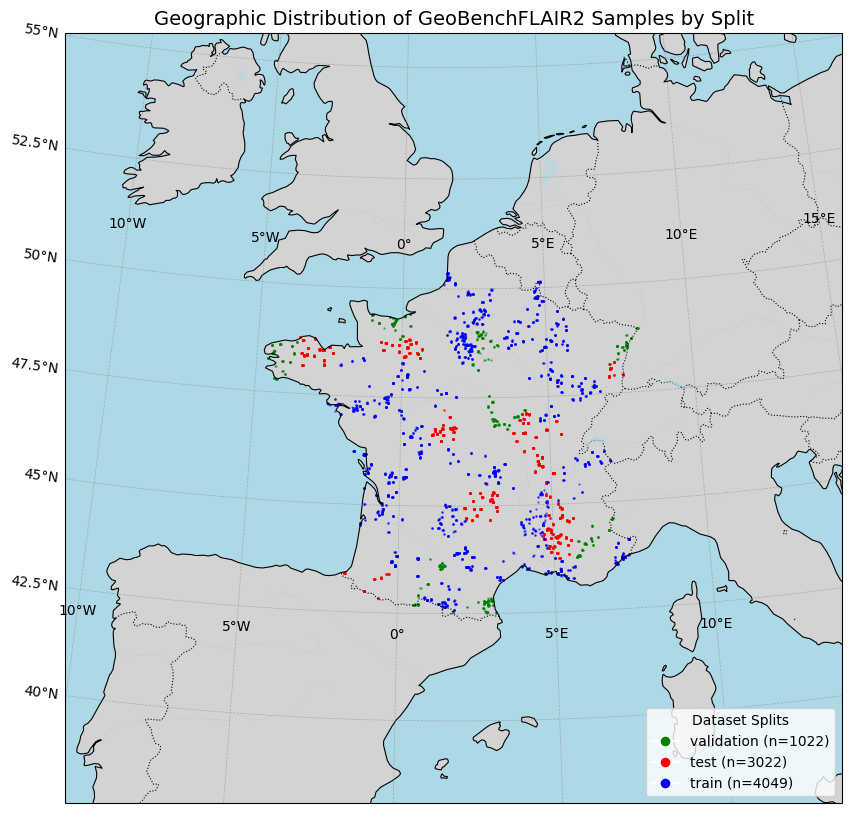

In [4]:
sample_dist_fig = datamodule.visualize_geospatial_distribution()

### Dataset Statistics

Computed over the training dataset.

### Image Statistics

In [6]:
fig = plot_channel_histograms(STATS_SATMAE_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '../../geobench_v2/datamodules/dataset_stats_satmae/flair2/flair2_stats.json'

### Target Statistics

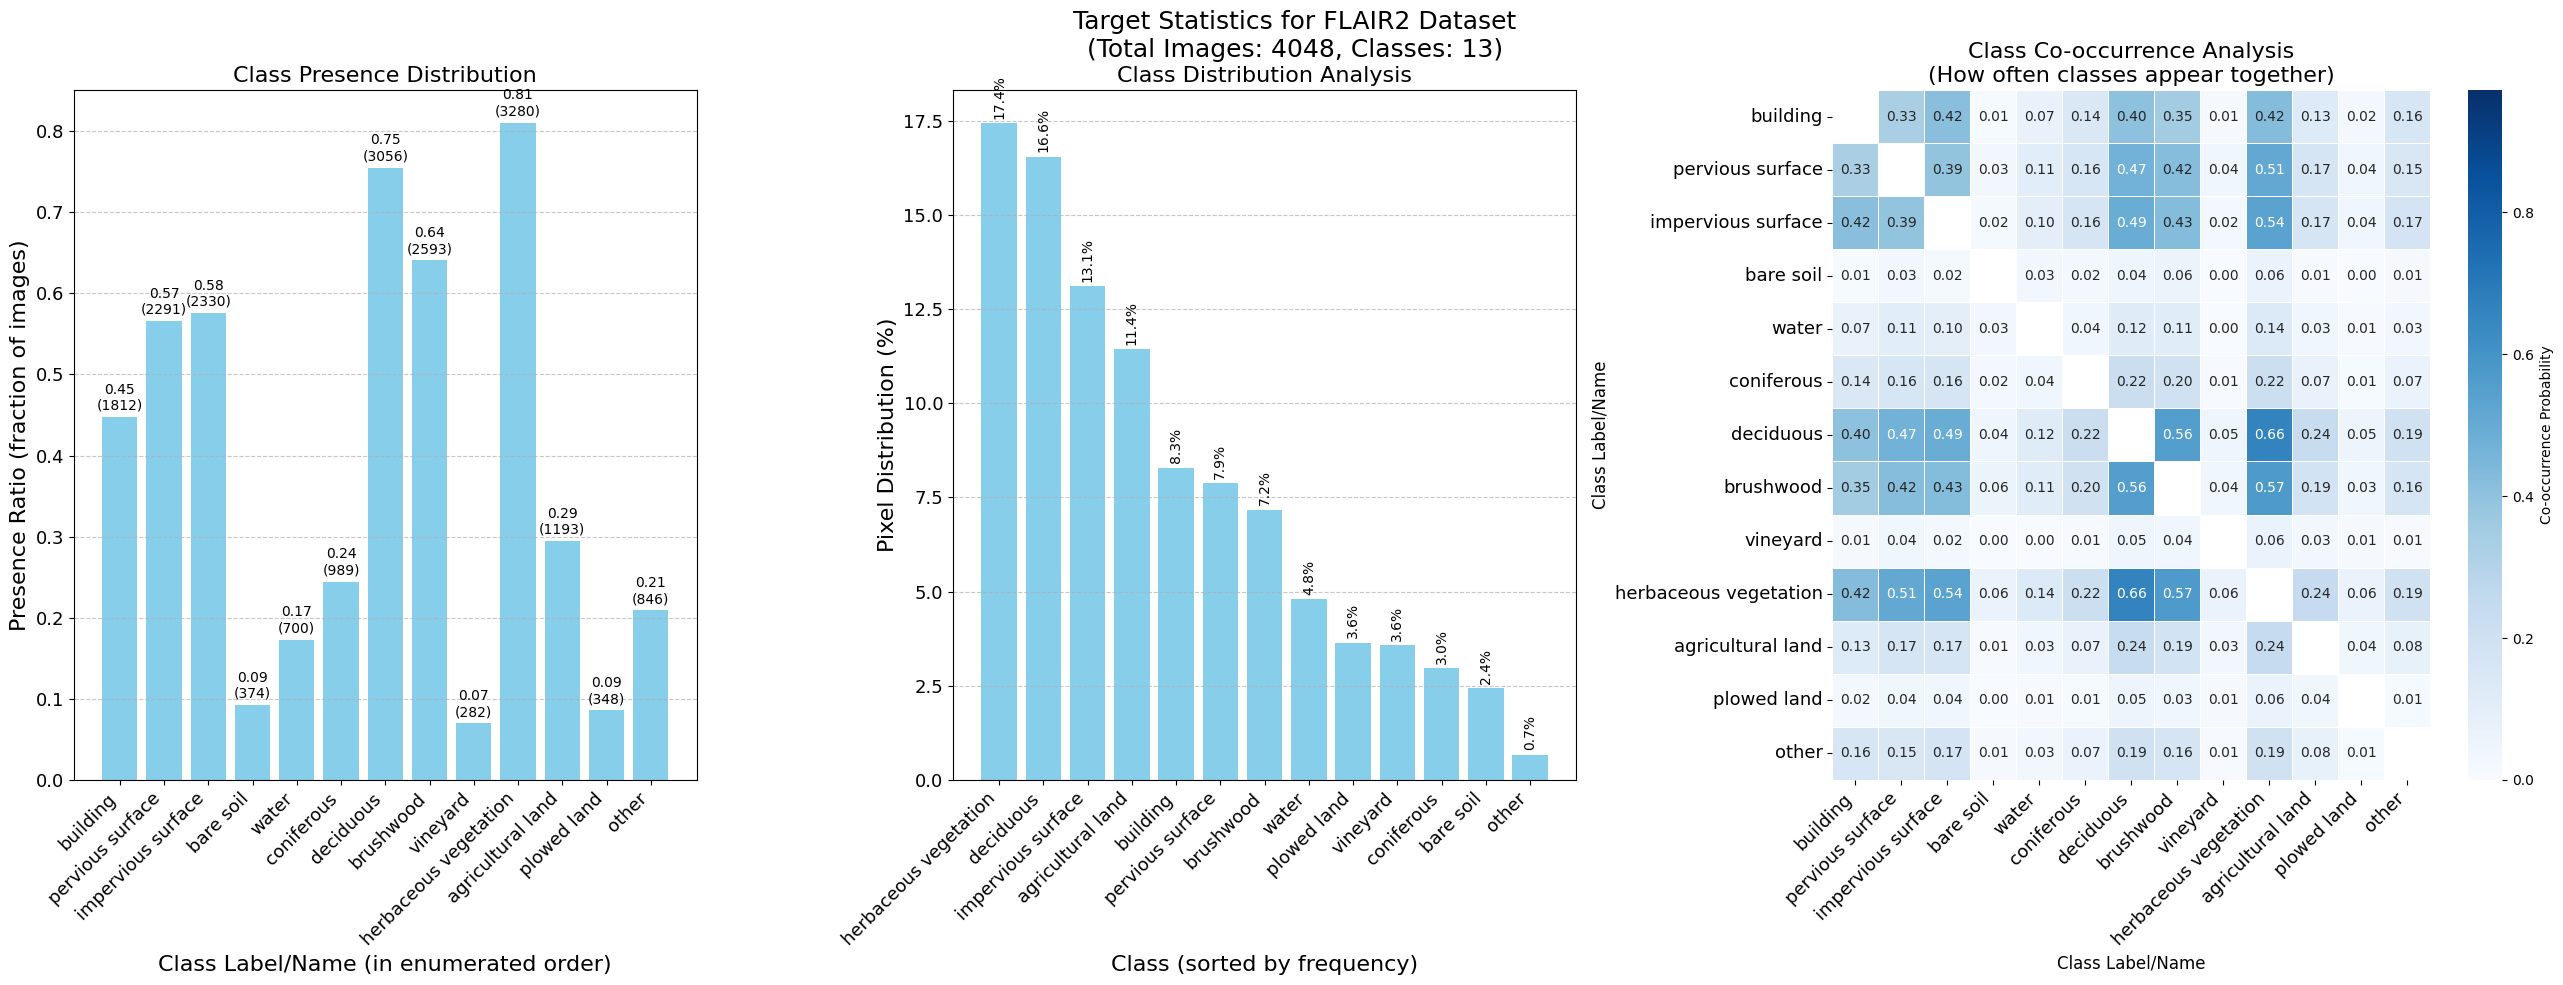

In [ ]:
fig = visualize_segmentation_target_statistics(STATS_SATMAE_PATH, "FLAIR2")

### Raw Batch Statistics

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

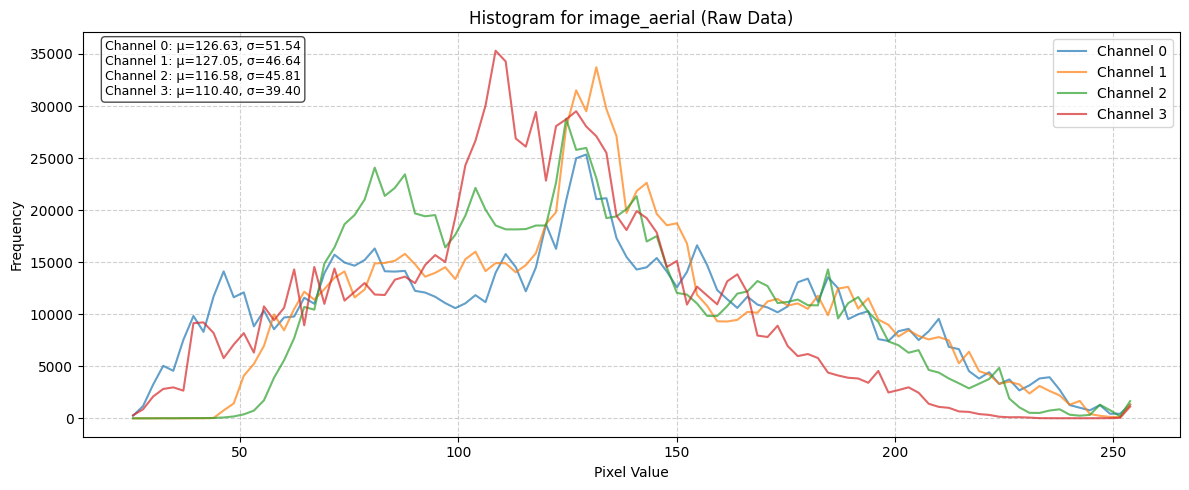

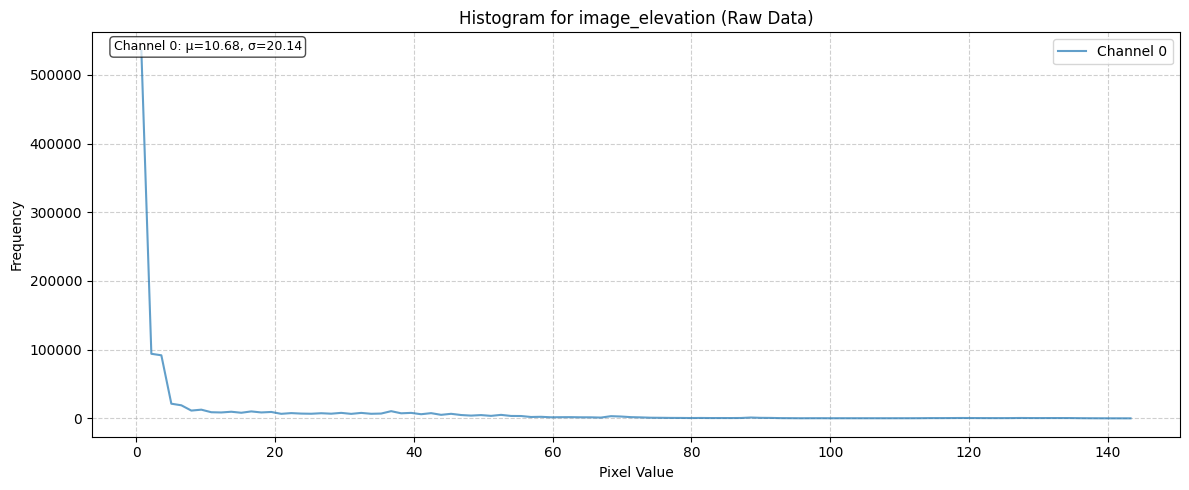

In [ ]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

### Effect of Normalization Schemes

In [ ]:
zscore_normalizer = ZScoreNormalizer(STATS_CLIP_RESCALE_PATH, band_order)
satmae_normalizer = SatMAENormalizer(STATS_SATMAE_PATH, band_order)

In [ ]:
norm_fig, normalized_batches = compare_normalization_methods(
    raw_batch, [zscore_normalizer, satmae_normalizer], datamodule
)

## Visualize Batch Data

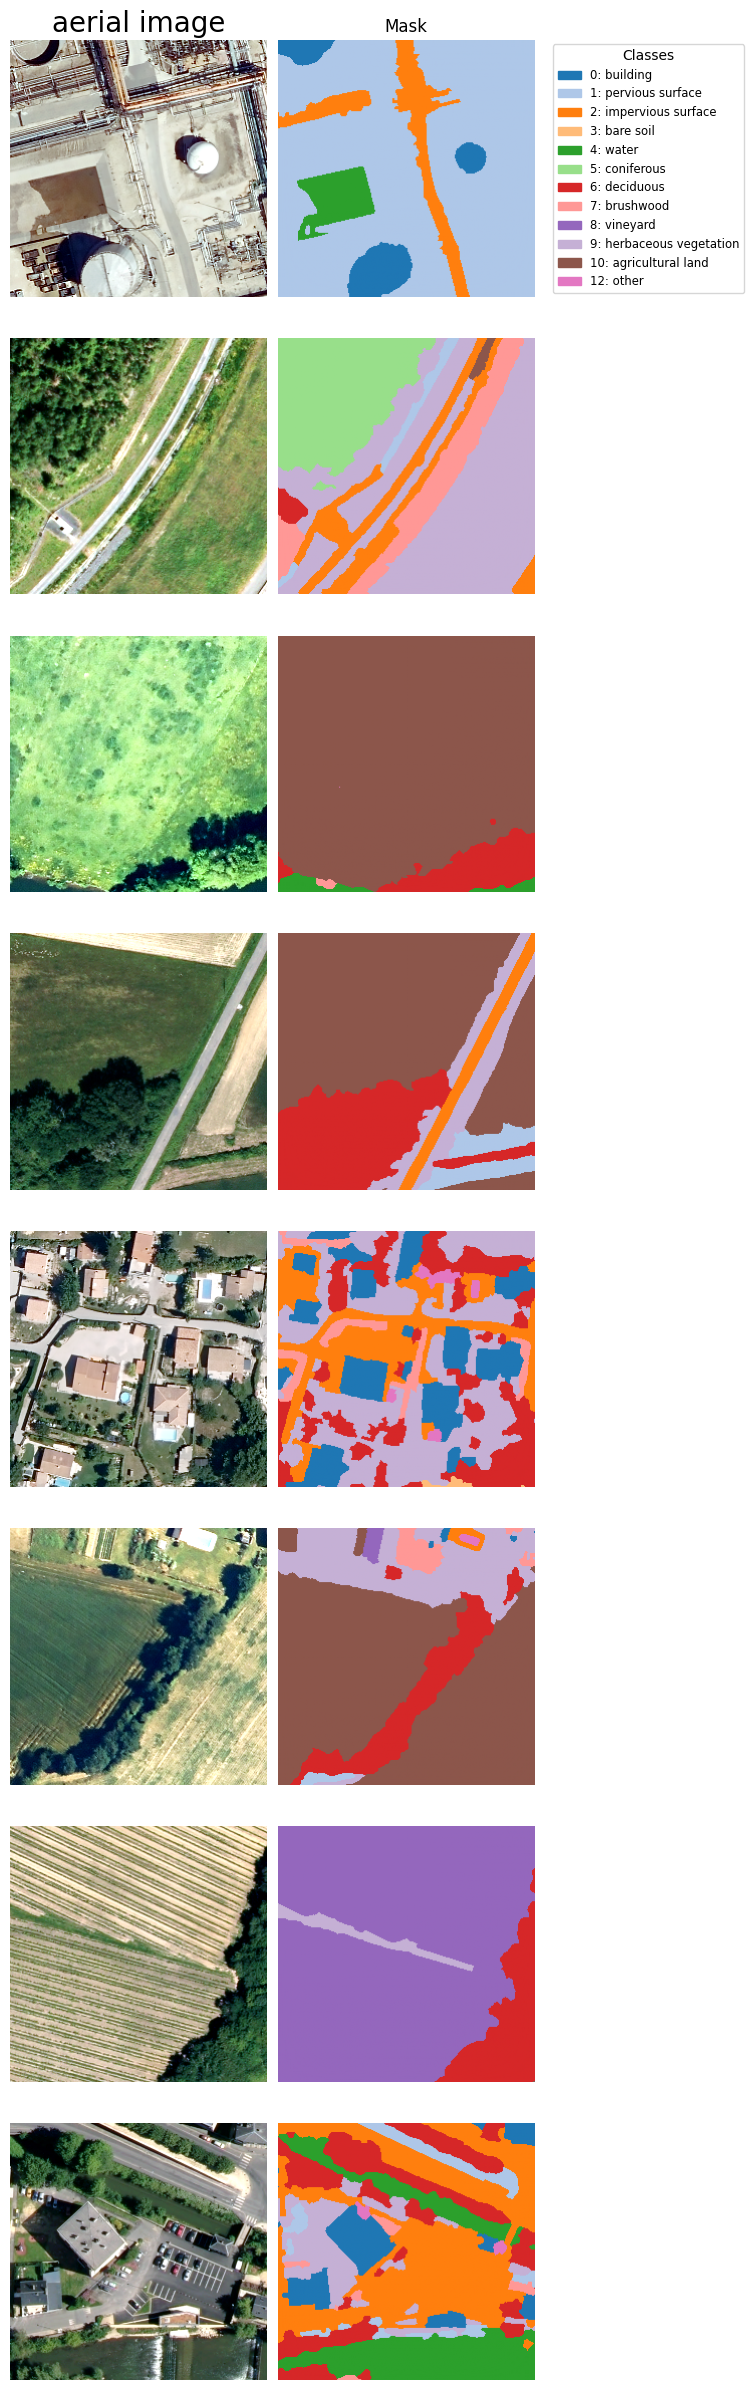

In [ ]:
fig, batch = datamodule.visualize_batch()